21374 Dataset hubgene prediction & model selection

In [30]:
import pandas as pd

# 读取表达矩阵（行为样本，列为基因 + 标签）
expression_df = pd.read_csv("gse21374.csv", index_col=0)

In [14]:
expression_df

,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,CYP2E1,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,Rejection Status
GSM533921,9.977242,6.600568,5.785312,10.792120,3.136564,7.374997,5.140061,5.069820,6.536344,3.666495,...,8.531635,8.459645,8.269925,9.848628,9.559851,11.928238,11.583730,13.653370,13.386179,nonrej
GSM533922,10.528307,6.488367,5.658249,10.973320,3.228242,7.581415,5.416706,4.873167,6.463633,3.717725,...,8.734464,8.747167,8.409865,10.177910,9.784476,12.336352,11.898083,13.843765,13.632752,nonrej
GSM533923,10.676130,6.651939,5.856184,10.669966,2.907612,8.281132,5.269089,4.669336,8.707918,4.014568,...,8.376691,8.384332,8.132519,10.046965,9.569640,12.116085,11.832005,13.667481,13.378050,nonrej
GSM533924,9.586508,6.141822,5.866988,10.342068,3.091361,7.753586,5.319843,4.795367,6.231689,3.554402,...,8.457440,8.078330,7.824382,10.106060,9.697052,12.001332,11.741060,13.485789,13.207374,nonrej
GSM533925,9.979894,6.097477,5.563888,10.622161,3.055088,7.230532,5.203597,4.984110,5.227120,3.722629,...,8.204733,7.874217,7.472743,9.727984,9.370505,11.958363,11.536944,13.471246,13.135800,nonrej
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM534198,9.915120,6.624997,5.568316,10.438484,3.103627,7.818179,5.421174,5.126141,6.215026,5.122113,...,7.993118,7.674132,7.387992,9.462764,9.072026,11.555894,11.048639,13.232026,12.899544,nonrej
GSM534199,10.144107,6.357931,5.652100,10.353695,3.146691,8.059700,5.402151,4.818083,8.423771,3.645498,...,8.000036,7.573051,7.360223,9.429183,9.008347,11.632159,11.113692,13.221589,12.937811,rej
GSM534200,10.561913,6.496042,5.696330,11.125695,3.236582,8.156774,5.411519,5.139511,5.891711,3.904116,...,8.167168,8.010875,7.881892,9.540081,9.151547,11.830302,11.330476,13.428277,13.152557,nonrej
GSM534201,10.179040,6.318934,6.072288,10.237774,3.112964,7.913483,5.462635,5.399999,8.669699,3.651492,...,8.556826,8.365313,8.160081,10.020628,9.670360,12.130981,11.740694,13.662238,13.427396,nonrej


21374's interval Hubgene

In [8]:
hub_genes = ["CXCL9", "MIR155 /// MIR155HG", "CD8A", "CLIC2", "GBP5.1", "235229_at", "RP1-93H18.6"]

In [9]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Rejection Status"].map({"rej": 1, "nonrej": 0})

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression Coefficients:
                  Gene  Coefficient
3                CLIC2     0.610288
5            235229_at     0.450816
1  MIR155 /// MIR155HG     0.198586
6          RP1-93H18.6     0.187683
2                 CD8A     0.152362
4               GBP5.1    -0.056243
0                CXCL9     0.027678


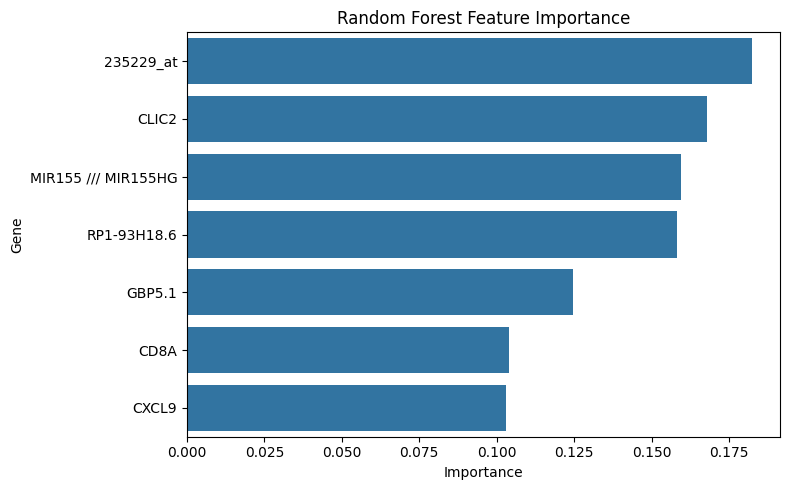


AUC - Logistic: 0.907
AUC - Random Forest: 0.879


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [12]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.905


21374's cyto node hubgene

In [3]:
hub_genes = ["CXCL9", "GZMA", "CD8A", "IDO1", "CD69"]

In [4]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Rejection Status"].map({"rej": 1, "nonrej": 0})

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression Coefficients:
    Gene  Coefficient
2   CD8A     0.412275
0  CXCL9     0.332155
3   IDO1     0.119002
4   CD69     0.106296
1   GZMA     0.043249


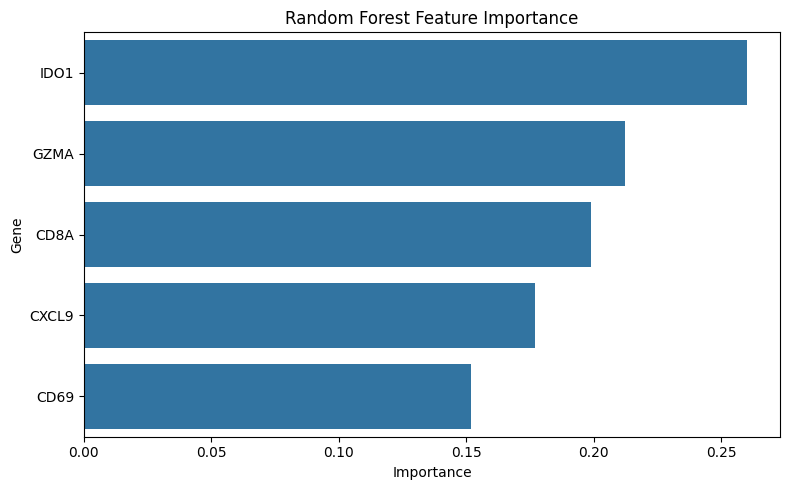


AUC - Logistic: 0.931
AUC - Random Forest: 0.896


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [7]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.929


36059's interval hub gene

In [15]:
hub_genes = ["CCL4", "PLA1A", "FAM26F.1", "CXCL11", "RBP7", "IDO1"]

In [16]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Rejection Status"].map({"rej": 1, "nonrej": 0})

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression Coefficients:
       Gene  Coefficient
2  FAM26F.1     0.498262
4      RBP7    -0.287828
3    CXCL11     0.281747
0      CCL4     0.220039
1     PLA1A    -0.146863
5      IDO1    -0.042699


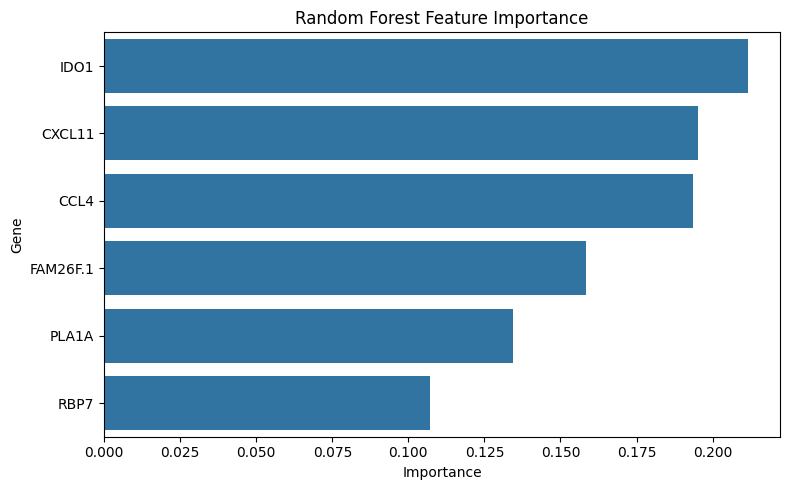


AUC - Logistic: 0.897
AUC - Random Forest: 0.870


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [ ]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(), 
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.898


36059's cyto node hubgene

In [20]:
hub_genes = ["CXCL10", "IDO1", "LILRB2", "CXCL9", "CCL4"]

In [21]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Rejection Status"].map({"rej": 1, "nonrej": 0})

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression Coefficients:
     Gene  Coefficient
3   CXCL9     0.360986
4    CCL4     0.331357
2  LILRB2     0.275450
1    IDO1     0.159125
0  CXCL10    -0.026511


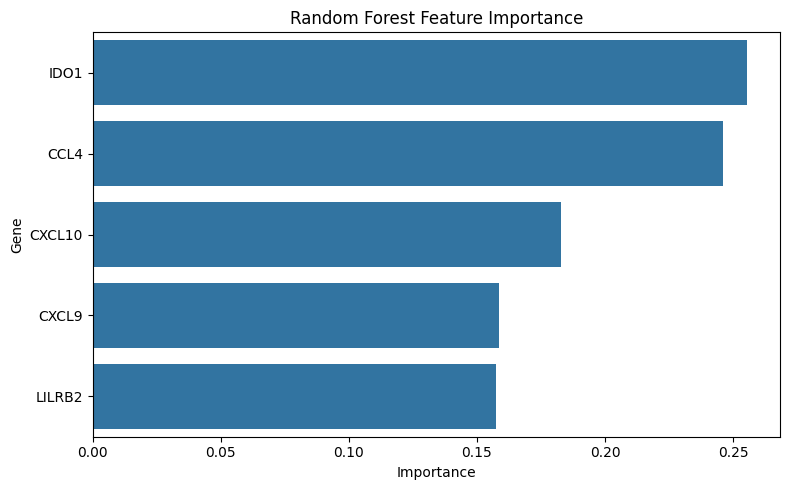


AUC - Logistic: 0.900
AUC - Random Forest: 0.881


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [ ]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# （level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# （level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(), 
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.901


48581's interval hub gene

In [31]:
hub_genes = ["SCMH1", "WDR3", "LOC100507073"]

Logistic Regression Coefficients:
           Gene  Coefficient
0         SCMH1    -0.860241
2  LOC100507073    -0.572751
1          WDR3     0.404869


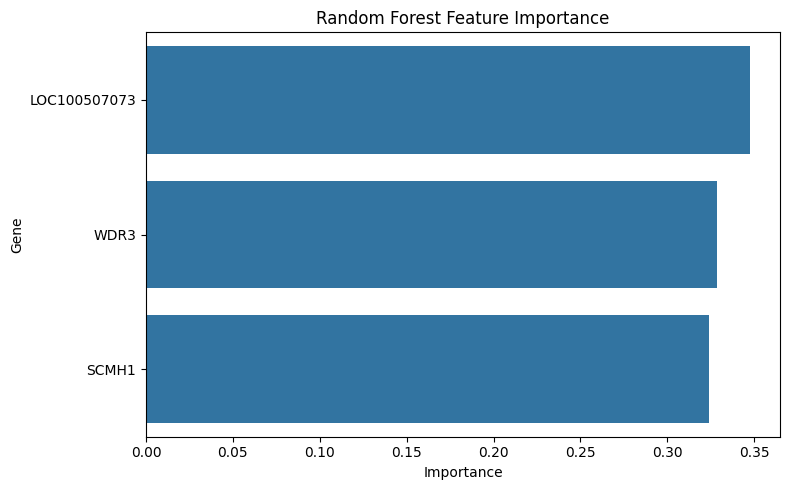


AUC - Logistic: 0.691
AUC - Random Forest: 0.595


In [32]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Rejection Status"].map({"rej": 1, "nonrej": 0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [33]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# （level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# （level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(), 
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.660


48581's cyto node hub gene

In [34]:
hub_genes = ["CXCL13", "LILRB2", "CD8A", "FOS", "RGS1"]

Logistic Regression Coefficients:
     Gene  Coefficient
1  LILRB2     0.742282
2    CD8A     0.628023
4    RGS1    -0.214736
0  CXCL13     0.133396
3     FOS     0.011985


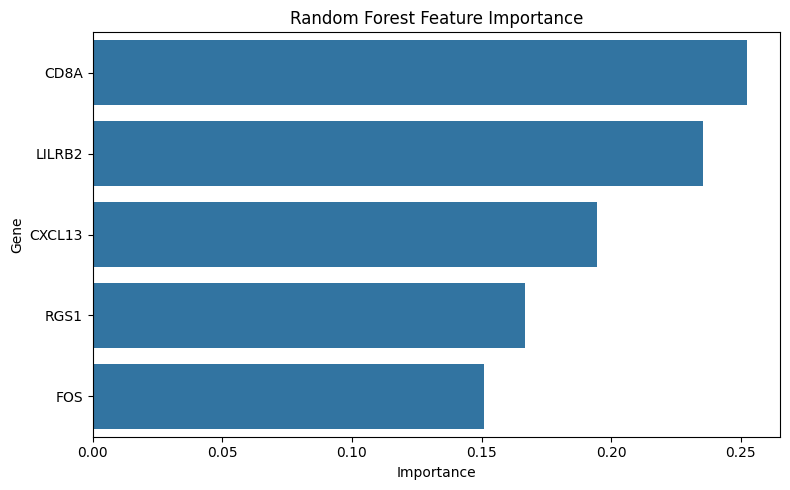


AUC - Logistic: 0.912
AUC - Random Forest: 0.874


In [35]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Rejection Status"].map({"rej": 1, "nonrej": 0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [37]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# （level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# （level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(), 
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.920


50058's interval hub gene

In [20]:
hub_genes = ["FAM26F.1", "GPR171", "229668_at", "B2M.2", "FAXDC2", "CCL4", "CXCL11", "SOST"]

Logistic Regression Coefficients:
        Gene  Coefficient
4     FAXDC2     0.665229
0   FAM26F.1     0.318942
3      B2M.2     0.293779
6     CXCL11     0.257220
1     GPR171     0.233245
5       CCL4     0.188804
2  229668_at    -0.185872
7       SOST    -0.073252


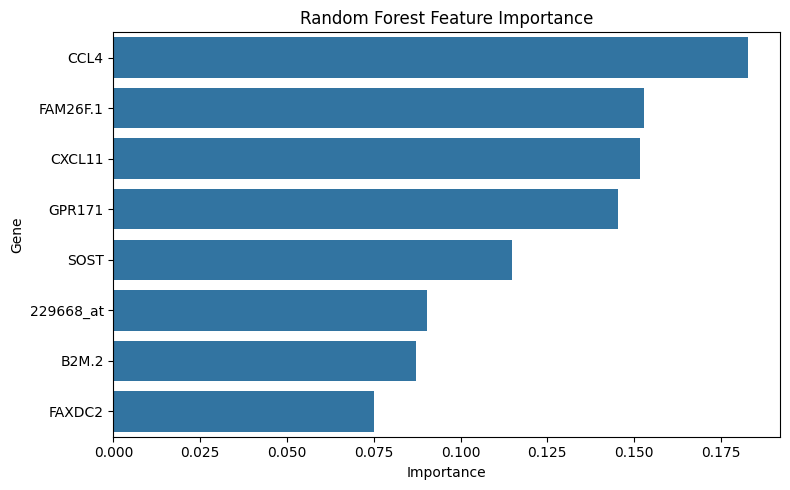


AUC - Logistic: 0.893
AUC - Random Forest: 0.894


In [21]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Rejection Status"].map({"rej": 1, "nonrej": 0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [22]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# （level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# （level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(), 
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.896


50058's cyto node hub gene

In [24]:
hub_genes = ["CXCL11", "B2M", "LCP2", "CCL4",  "FCGR3B"]

Logistic Regression Coefficients:
     Gene  Coefficient
1     B2M     0.873823
2    LCP2     0.523463
0  CXCL11     0.259551
4  FCGR3B     0.191920
3    CCL4     0.147251


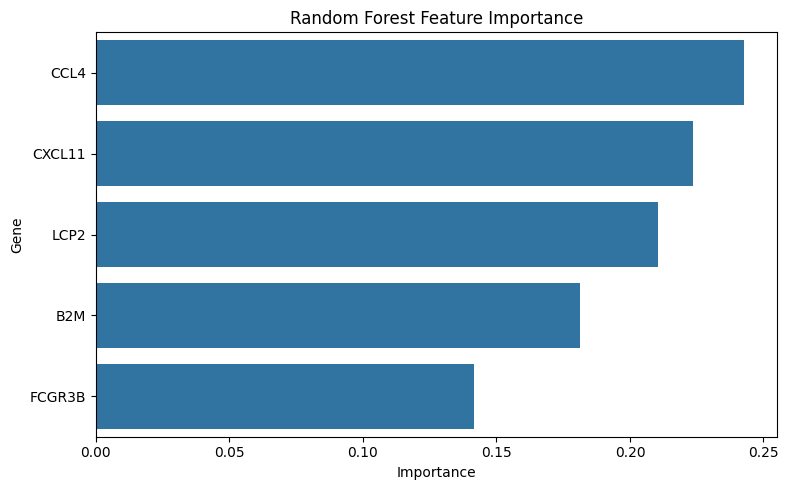


AUC - Logistic: 0.880
AUC - Random Forest: 0.866


In [25]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Rejection Status"].map({"rej": 1, "nonrej": 0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [26]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# （level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# （level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(), 
    cv=5
)

stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.884
